In [1]:
import garth

In [2]:
garth.resume('~/.garth')
garth.client.auth_token.refresh()
garth.save('~/.garth')

In [3]:
garth.DailySleep.list(period=30)

[DailySleep(calendar_date=datetime.date(2023, 6, 29), value=84),
 DailySleep(calendar_date=datetime.date(2023, 6, 30), value=70),
 DailySleep(calendar_date=datetime.date(2023, 7, 1), value=60),
 DailySleep(calendar_date=datetime.date(2023, 7, 2), value=70),
 DailySleep(calendar_date=datetime.date(2023, 7, 3), value=82),
 DailySleep(calendar_date=datetime.date(2023, 7, 4), value=75),
 DailySleep(calendar_date=datetime.date(2023, 7, 5), value=70),
 DailySleep(calendar_date=datetime.date(2023, 7, 6), value=28),
 DailySleep(calendar_date=datetime.date(2023, 7, 7), value=79),
 DailySleep(calendar_date=datetime.date(2023, 7, 8), value=70),
 DailySleep(calendar_date=datetime.date(2023, 7, 9), value=77),
 DailySleep(calendar_date=datetime.date(2023, 7, 10), value=87),
 DailySleep(calendar_date=datetime.date(2023, 7, 11), value=64),
 DailySleep(calendar_date=datetime.date(2023, 7, 12), value=58),
 DailySleep(calendar_date=datetime.date(2023, 7, 13), value=71),
 DailySleep(calendar_date=datetime

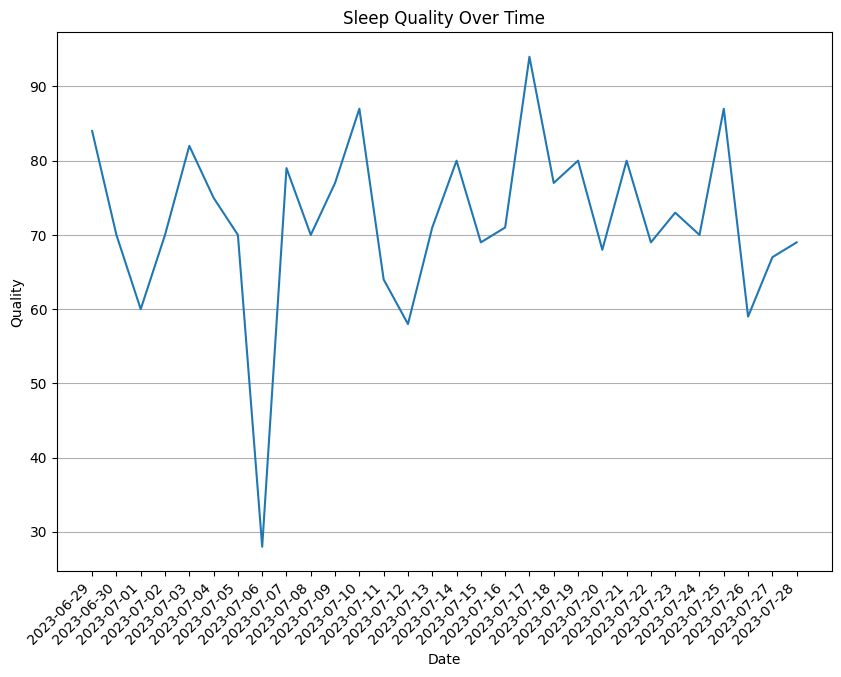

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

daily_sleep = pd.DataFrame(garth.DailySleep.list(period=30))
daily_sleep.set_index('calendar_date', inplace=True)
daily_sleep.plot(kind='line', grid=True, figsize=(10, 7), legend=False)

plt.ylabel('Quality')
plt.xlabel('Date')
plt.title('Sleep Quality Over Time')

ax = plt.gca()
ax.grid(axis='x')
plt.xticks(ticks=daily_sleep.index, rotation=45, ha='right')

plt.show()

In [5]:
garth.SleepData.get('2023-07-20')

SleepData(daily_sleep_dto=DailySleepDTO(id=1689830700000, user_profile_pk=2591602, calendar_date=datetime.date(2023, 7, 20), sleep_time_seconds=23700, nap_time_seconds=0, sleep_window_confirmed=True, sleep_window_confirmation_type='enhanced_confirmed_final', sleep_start_timestamp_gmt=datetime.datetime(2023, 7, 20, 5, 25, tzinfo=TzInfo(UTC)), sleep_end_timestamp_gmt=datetime.datetime(2023, 7, 20, 12, 11, tzinfo=TzInfo(UTC)), sleep_start_timestamp_local=datetime.datetime(2023, 7, 19, 23, 25, tzinfo=TzInfo(UTC)), sleep_end_timestamp_local=datetime.datetime(2023, 7, 20, 6, 11, tzinfo=TzInfo(UTC)), unmeasurable_sleep_seconds=0, deep_sleep_seconds=9660, light_sleep_seconds=12600, rem_sleep_seconds=1440, awake_sleep_seconds=660, device_rem_capable=True, retro=False, sleep_from_device=True, sleep_version=2, awake_count=1, sleep_scores=SleepScores(total_duration=Score(qualifier_key='FAIR', optimal_start=28800.0, optimal_end=28800.0, value=None, ideal_start_in_seconds=None, ideal_end_in_seconds=

In [6]:
sleep_data_list = garth.SleepData.list(days=30)

In [7]:
import pandas as pd
from pydantic import BaseModel
from typing import List, Union
from dataclasses import is_dataclass

def dataclass_to_dict(dataclass_instance: Union[BaseModel, list]):
    if isinstance(dataclass_instance, list):
        return [dataclass_to_dict(item) for item in dataclass_instance]
    elif is_dataclass(dataclass_instance):
        return {k: dataclass_to_dict(v) for k, v in dataclass_instance.__dict__.items()}
    else:
        return dataclass_instance

def dataclass_to_dataframe(dataclass_list: List[BaseModel]) -> pd.DataFrame:
    dict_list = dataclass_to_dict(dataclass_list)
    return pd.json_normalize(dict_list)


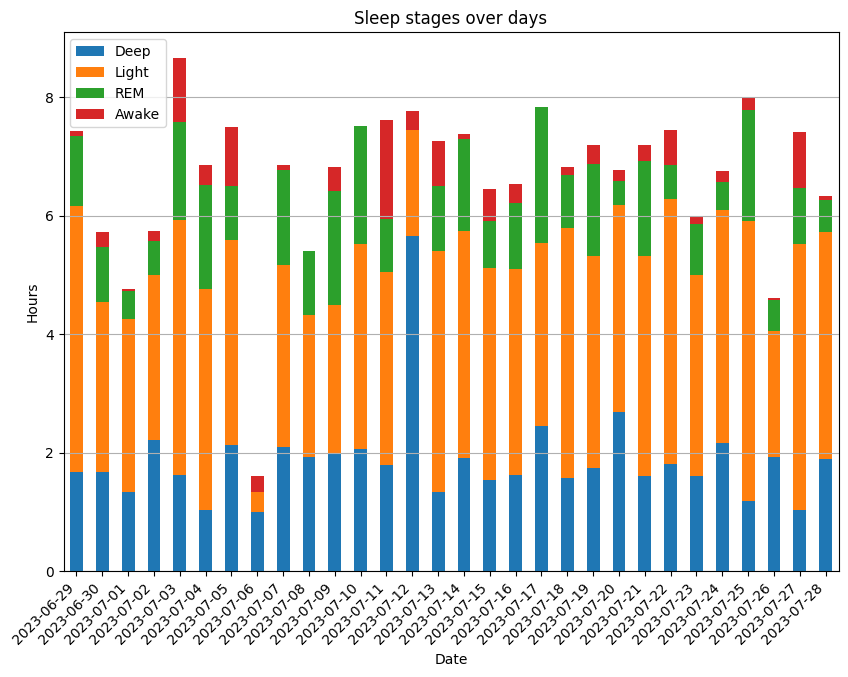

In [8]:
import matplotlib.pyplot as plt

df = dataclass_to_dataframe(sleep_data_list)

# Convert the relevant sleep time columns from seconds to hours
df["daily_sleep_dto.deep_sleep_hours"] = df["daily_sleep_dto.deep_sleep_seconds"] / 3600
df["daily_sleep_dto.light_sleep_hours"] = df["daily_sleep_dto.light_sleep_seconds"] / 3600
df["daily_sleep_dto.rem_sleep_hours"] = df["daily_sleep_dto.rem_sleep_seconds"] / 3600
df["daily_sleep_dto.awake_sleep_hours"] = df["daily_sleep_dto.awake_sleep_seconds"] / 3600

# Ensure calendar_date is datetime and then sort in ascending order
df["daily_sleep_dto.calendar_date"] = pd.to_datetime(df["daily_sleep_dto.calendar_date"]).dt.date
df.sort_values("daily_sleep_dto.calendar_date", inplace=True)
df.set_index("daily_sleep_dto.calendar_date", inplace=True)

# Rename columns for clarity
df.rename(columns={
    'daily_sleep_dto.deep_sleep_hours': 'Deep', 
    'daily_sleep_dto.light_sleep_hours': 'Light', 
    'daily_sleep_dto.rem_sleep_hours': 'REM', 
    'daily_sleep_dto.awake_sleep_hours': 'Awake'
}, inplace=True)

# Create bar plot
df[['Deep', 'Light', 'REM', 'Awake']].plot(kind='bar', stacked=True, figsize=(10, 7))

plt.ylabel("Hours")
plt.xlabel("Date")
plt.title("Sleep stages over days")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()